Epoch 1/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.8866 - loss: 0.3675 - val_accuracy: 0.9868 - val_loss: 0.0483
Epoch 2/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.9838 - loss: 0.0543 - val_accuracy: 0.9890 - val_loss: 0.0390
Epoch 3/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.9899 - loss: 0.0334 - val_accuracy: 0.9868 - val_loss: 0.0442
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9870 - loss: 0.0418

✅ Test Accuracy: 0.9902


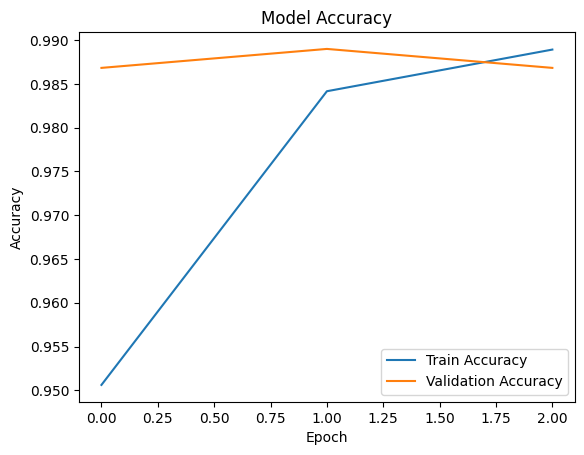

In [12]:
# 1. Import required libraries
import tensorflow as tf
from tensorflow.keras import layers, models, Input
import matplotlib.pyplot as plt

# 2. Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 3. Preprocess the data
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# 4. Build the CNN model using Input() (no warnings)
model = models.Sequential([
    Input(shape=(28, 28, 1)),  # Use Input here instead of input_shape in Conv2D
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 5. Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 6. Train the model
history = model.fit(x_train, y_train, epochs=3, validation_split=0.1)

# 7. Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")

# 8. Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()
